## วัตถุประสงค์การเรียนรู้
* ศึกษาวิธีการเตรียมข้อมูลสำหรับโมเดลการเรียนรู้แบบมีผู้สอนแบบต่างๆ
* ศึกษาวิธีการปรับค่า hyperparameters ต่างๆ ของโมเดลโดยใช้วิธีการค้นหาแบบกริด (grid search)
* ศึกษาวิธีการสกัดฟีเจอร์ที่สำคัญจากโมเดลที่ปรับแต่งแล้ว
* ศึกษาวิธีการประเมินประสิทธิภาพของโมเดลการจำแนกประเภท (classification) และ โมเดลการทำนายค่า (regression model)

ในบทนี้ เราจะศึกษาวิธีการทำ Machine Learning โดยใช้ไลบารี่ Scikit-Learn (https://scikit-learn.org/) ซึ่งเป็นไลบารี่รหัสเปิดที่ประกอบด้วยอัลกอริทึมการเรียนรู้เครื่องจักรประเภทต่างๆ ทั้งการเรียนรู้แบบมีผู้สอน และการเรียนรู้แบบไม่มีผู้สอน โดยเราจะใช้ไลบารี่ scikit-learn สำหรับสร้างโมเดลต่างๆ ดังนี้คือ 
* linear regression
* logistic regression
* support vector machines (SVMs)
* decision trees
* random forests

## Linear Regression

ในการทำนายค่าด้วยวิธี Regression ค่าของตัวแปรตาม (dependent variable) หนึ่งตัวจะถูกทำนายจากค่าของตัวแปรต้น (independent variables) หลายๆ ตัว เราสามารถใช้ Regression สำหรับการทำนายค่า ดังเช่น
* การทำนายเปอร์เซ็นต์ที่ทีมฟุตบอลลิเวอร์พูลจะชนะ เมื่อกำหนดสถิติการเล่นของทีมลิเวอร์พูลและทีมคู่แข่ง
* การทำนายอัตราเสี่ยงของการเกิดหัวใจวาย เมื่อทราบประวัติสุขภาพของบุคคลในครอบครัวและค่าที่วัดได้ทางกายภาพและสรีรวิทยาต่างๆ 
* โอกาสที่หิมะจะตก เมื่อกำหนดผลการวัดค่าทางภูมิอากาศต่างๆ

linear regression และ logistic regression เป็นที่นิยมใช้เนื่องมาจากความง่าย ความโปร่งใส (transparency) ความสามารถในการตีความผลลัพธ์ที่ได้จากโมเดล (interpretability) และความสามารถในการนำไปใช้กับค่าอินพุทที่ไม่ได้อยู่ในชุดข้อมูลฝึกฝน (extrapolation or generalization) 

ผลลัพธ์ของ linear regression คือเส้นตรงที่ลากผ่านชุดข้อมูลที่ทำให้ค่าของผลต่างระหว่างค่าของจุดข้อมูล (observations) กับค่าของฟังก์ชันเส้นตรง (predicted values) มีค่าน้อยที่สุด 

สมมติฐานของ linear regression คือ ความสัมพันธ์ระหว่างฟีเจอร์และตัวแปรตาม สอดคล้องกับสมการเส้นตรง ซึ่งนิยามโดยค่าความชันและจุดตัด (slope and intercept) ในรูปแบบ $y = \alpha + \beta x$ เมื่อ $\alpha$ คือค่าจุดตัด (ค่า $y$ เมื่อ $x=0$) และ $\beta$ คือค่าความชัน ส่วน $x$ คือตัวแปรต้น (independent variables) 

ต่อไปเราจะแสดงวิธีการทำ linear regression ทั้งแบบ simple linear regression และ multiple linear regression

### เตรียมข้อมูลสำหรับ Linear Regression Model

1. download ข้อมูลอากาศในเมืองๆ หนึ่งของประเทศฮังการี่ ระหว่าง April 1, 2006 ถึง September 9, 2016 

In [4]:
!wget https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter03/weather.csv

--2019-09-20 11:21:23--  https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter03/weather.csv
Resolving raw.githubusercontent.com... 151.101.8.133
Connecting to raw.githubusercontent.com|151.101.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 495176 (484K) [text/plain]
Saving to: ‘weather.csv.1’

weather.csv.1       100%[===================>] 483.57K  1.61MB/s    in 0.3s    

2019-09-20 11:21:24 (1.61 MB/s) - ‘weather.csv.1’ saved [495176/495176]



ข้อมูลดังกล่าวประกอบด้วย ผลการสังเกต หรือ จุดข้อมูลจำนวน 10,000 เรคอร์ด แต่ละจุดข้อมูลมีค่าฟีเจอร์ 8 ค่าดังนี้คือ
* Temperature_c: อุณหภูมิ หน่วยเป็นองศาเซลเซียส
* Humidity: สัดส่วนของความชื้น
* Wind_Speed_kmh: ความเร็วลมหน่วยเป็น กม. ต่อ ชม. (kilometers per hour)
* Wind_Bearing_Degrees: ทิศทางลมหน่วยเป็นดีกรี ในทิศทางตามเข็มนาฬิกาจากทิศเหนือ
* Visibility_km: ความสามารถในการมองเห็นหน่วยเป็น กิโลเมตร
* Pressure_millibars: ความดันอากาศวัดในหน่วย มิลลิบาร์
* Rain: มีค่าเป็น 1 หากฝนตก และมีค่าเป็น 0 หากหิมะตก

2. ใช้ไลบารี่ pandas นำเข้าข้อมูลจากไฟล์ `weather.csv`

In [8]:
import pandas as pd

df = pd.read_csv('weather.csv')

3. ตรวจสอบข้อมูลโดยใช้ `df.info()` และ `df.head(5)`

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
Temperature_c           10000 non-null float64
Humidity                10000 non-null float64
Wind_Speed_kmh          10000 non-null float64
Wind_Bearing_degrees    10000 non-null int64
Visibility_km           10000 non-null float64
Pressure_millibars      10000 non-null float64
Rain                    10000 non-null int64
Description             10000 non-null object
dtypes: float64(5), int64(2), object(1)
memory usage: 625.1+ KB


In [11]:
df.head(5)

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


4. จะเห็นได้ว่าคอลัมน์ `Description` เป็นตัวแปรแบบ Categorical เราสามารถตรวจสอบจำนวนประเภททั้งหมดในคอลัมน์ `Description` ของ dataframe นี้ได้ดังนี้

In [20]:
levels = len(pd.value_counts(df['Description']))

print('There are {} levels in the Description column'.format(levels))

There are 3 levels in the Description column


5. แปลง Categorical value attribute ไปเป็น indicator variables

In [23]:
df_dummies = pd.get_dummies(df, drop_first=True)

df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Temperature_c           10000 non-null float64
Humidity                10000 non-null float64
Wind_Speed_kmh          10000 non-null float64
Wind_Bearing_degrees    10000 non-null int64
Visibility_km           10000 non-null float64
Pressure_millibars      10000 non-null float64
Rain                    10000 non-null int64
Description_Normal      10000 non-null uint8
Description_Warm        10000 non-null uint8
dtypes: float64(5), int64(2), uint8(2)
memory usage: 566.5 KB


6. สลับตำแหน่งของข้อมูลเพื่อป้องกันผลกระทบจากลำดับข้อมูล โดยใช้คำสั่ง `shuffle`

In [25]:
from sklearn.utils import shuffle

df_shuffled = shuffle(df_dummies, random_state=42)

7. แบ่งข้อมูลออกเป็นฟีเจอร์ $X$ และตัวแปรตาม $y$

In [27]:
DV = 'Temperature_c'

X = df_shuffled.drop(DV, axis=1)
y = df_shuffled[DV]

8. แบ่ง $X$ และ $y$ ออกเป็น ชุดข้อมูลฝึกฝน และุดข้อมูลทดสอบ

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size=0.33, random_state=42)

In [29]:
X_train.head(2)

,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Normal,Description_Warm
5757,0.76,8.4525,38,14.9569,1028.63,1,1,0
7510,0.85,12.8800,150,8.0500,1021.90,0,0,0


In [31]:
y_train.head(2)

5757    13.577778
7510     0.000000
Name: Temperature_c, dtype: float64

### ฟิตโมเดล Simple Linear Regression กับชุดข้อมูลฝึกฝน

โมเดล Simple Linear Regression เป็นโมเดลที่สร้างความสัมพันธ์ระหว่าง ฟีเจอร์หนึ่งตัว กับ ค่าผลลัพธ์แบบต่อเนื่อง (continuous outcome variable) โดยใช้สมการ $y = \alpha + \beta x$ ในหัวข้อนี้ เราจะสร้าง Simple Linear Regression Model โดยใช้ scikit-learn

1. สร้างอ็อบเจ็กต์ `LinearRegression` 

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

2. ฟิตโมเดลกับฟีเจอร์ Humidity

In [33]:
model.fit(X_train[['Humidity']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

3. ดึงค่าจุดตัด (intercept) และค่าความชัน (coefficient) ของ regression model

In [34]:
intercept = model.intercept_

coefficient = model.coef_

4. Simple Linear Regression Model ที่ได้จากการเรียนรู้คือ

In [37]:
print('Temperature = {0:0.2f} + ({1:0.2f}) x Humidity'.format(
                intercept, coefficient[0]))

Temperature = 34.50 + (-30.69) x Humidity


### ทำนายและประเมินประสิทธิภาพของ Simple Linear Regression Model

In [38]:
predictions = model.predict(X_test[['Humidity']])

from sklearn import metrics
import numpy as np

metrics_df = pd.DataFrame(
            {'Metric': 
             ['MAE', 'MSE', 'RMSE', 'R-Squared'],
             'Value':  
             [metrics.mean_absolute_error(y_test, predictions),
              metrics.mean_squared_error(y_test, predictions),
              np.sqrt(metrics.mean_squared_error(y_test, predictions)),
              metrics.explained_variance_score(y_test, predictions)]
            }).round(3)

print(metrics_df)

      Metric   Value
0        MAE   6.052
1        MSE  56.187
2       RMSE   7.496
3  R-Squared   0.389


* Mean Absolute Error (MAE): คือ ค่าเฉลี่ยของความต่าง (absolute difference) ระหว่างค่าที่ทำนายได้กับค่าจริง

* Mean Squared Error (MSE): คือ ค่าเฉลี่ยของกำลังสองของความแตกต่างระหว่างค่าที่ทำนายได้กับค่าจริง

* Root Mean Squred Error (RMSE): คือ รากที่สองของ MSE

* R-Squared: เป็นค่าที่บอกถึงสัดส่วนของความแปรปรวนของตัวแปรตามซึ่งสามารถอธิบายได้โดยโมเดลนี้

จากตัวอย่างข้างต้นจะพบว่า ค่าความชื้น หรือ Humidity สามารถอธิบายค่าอุณหภูมิหรือตัวแปรตามได้เพียง 38.9% ของค่าความแปรปรวนของอุณหภูมิ และความผิดพลาดของโมเดลจะมีค่าอยู่ภายในช่วง $\pm\ 6.052$

### ทำความเข้าใจประสิทธิภาพของโมเดลโดยใช้ Data Visualization

5. เราจะเริ่มจากการดูความสัมพันธ์ระหว่างคำทำนายที่ได้จากโมเดลและค่าเอาท์พุทจริง โดยการใช้ scatterplot

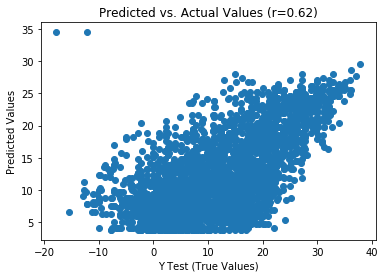

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import pearsonr

plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r={0:0.2f})'.format(
                    pearsonr(y_test, predictions)[0], 2))
plt.show()

จากกราฟข้างต้นจะเห็นได้ว่า ค่า y_test และ predicted_value แปรผันตามกัน โดยมีค่า Pearson r value เท่ากับ 0.62 ซึ่งหมายความว่า y_test และ predicted_value มีความสัมพันธ์กันเชิงบวกแบบเชิงเส้นในระดับกลาง (moderate, positive linear correlation)

6. โมเดลที่ฟิตกับชุดข้อมูลได้ดี จะมีการกระจายของค่าความแตกต่าง (residuals) เป็นแบบปกติ

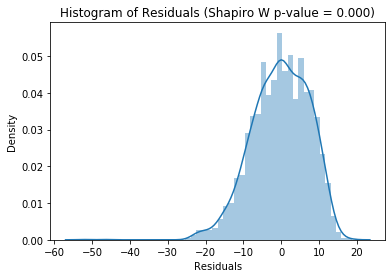

In [42]:
import seaborn as sns
from scipy.stats import shapiro

sns.distplot((y_test - predictions), bins=50)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(
            shapiro(y_test - predictions)[1]))

plt.show()

จากภาพฮิสโตแกรม จะเห็นได้ว่า Residuals มีการกระจายเบี่ยงไปทางขวา (negatively skewed) และมีค่า Shapiro W p-value เท่ากับศูนย์ หมายความว่าการกระจายข้อมูลนี้ไม่ใช่แบบปกติ (not normal distribution) ดังนั้นโมเดลนี้จึงยังไม่สามารถฟิตกับชุดข้อมูลได้ดีพอ เราจึงจำเป็นต้องพัฒนาโมเดลให้ดียิ่งขึ้นได้

### Multiple Linear Regression

โมเดล Multiple Linear Regression เป็นโมเดลที่แสดงความสัมพันธ์ระหว่างฟีเจอร์ตั้งแต่สองตัวขึ้นไป กับ ค่าผลลัพธ์แบบต่อเนื่อง (continuous outcome variable) โดยใช้สมการในรูปแบบ $y = \alpha + \beta_1 x_i,1 + \beta_2 x_i,2 + ... + \beta_p x_i,p$

เราจะใช้ scikit-learn สร้าง Multiple Linear Regression Model

In [44]:
# Construct a model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [45]:
# Fit the Model

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
# Extract intercept, and coefficients

intercept = model.intercept_
coefficients = model.coef_

print('Temperature = {0:0.2f} + ({1:0.2f} x Humidity) + ({2:0.2f} x Wind Speed) + ({3:0.2f} x Wind Bearing Degrees) + ({4:0.2f} x Visibility) + ({5:0.2f} x Pressure) + ({6:0.2f} x Rain) + ({7:0.2f} x Normal Weather) + ({8:0.2f} x Warm Weather)'.
          format(intercept, 
          coefficients[0],
          coefficients[1],                 
          coefficients[2],
          coefficients[3],
          coefficients[4],                 
          coefficients[5],
          coefficients[6],
          coefficients[7]))

Temperature = 3.54 + (-7.93 x Humidity) + (-0.07 x Wind Speed) + (0.00 x Wind Bearing Degrees) + (0.06 x Visibility) + (0.00 x Pressure) + (5.61 x Rain) + (8.54 x Normal Weather) + (19.10 x Warm Weather)


In [48]:
# predict and evaluate
predictions = model.predict(X_test)

from sklearn import metrics
import numpy as np

metrics_df = pd.DataFrame(
            {'Metric': 
             ['MAE', 'MSE', 'RMSE', 'R-Squared'],
             'Value':  
             [metrics.mean_absolute_error(y_test, predictions),
              metrics.mean_squared_error(y_test, predictions),
              np.sqrt(metrics.mean_squared_error(y_test, predictions)),
              metrics.explained_variance_score(y_test, predictions)]
            }).round(3)

print(metrics_df)

      Metric   Value
0        MAE   2.861
1        MSE  12.317
2       RMSE   3.510
3  R-Squared   0.866
